<a href="https://colab.research.google.com/github/arthurfvs/cp5/blob/main/cp5python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## GRUPO:

Arthur favero (rm556694)

Aurelio de Jesus (rm96027)

Giovanni antonio(rm555582)

Guilherme Miro (rm99971)

Maria Bizon (rm558195)


In [ ]:
pip install pandas


In [ ]:
import pandas as pd
from google.colab import files



In [ ]:

uploaded = files.upload()


Saving covid_19_data.csv to covid_19_data.csv


In [ ]:
df = pd.read_csv('covid_19_data.csv')

In [ ]:
df_sem_na = df.dropna()

# Remover colunas com qualquer valor ausente
df_sem_na_colunas = df.dropna(axis=1)

In [ ]:
# Preencher valores ausentes com 0
df_preenchido_zero = df.fillna(0)

In [ ]:
df_preenchido_media = df.fillna(df.mean(numeric_only=True))

In [ ]:
df_ffill = df.fillna(method='ffill')

<ipython-input-12-bdc000d53cae>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')


In [ ]:
# Normalizar os valores numéricos
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('covid_19_data.csv')

colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()

df[colunas_numericas] = scaler.fit_transform(df[colunas_numericas])

print(df.head())


        SNo ObservationDate Province/State  Country/Region      Last Update  \
0  0.000000      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1  0.000003      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2  0.000007      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3  0.000010      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4  0.000013      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed    Deaths  Recovered  
0   0.049115  0.001581   0.117785  
1   0.049118  0.001581   0.117785  
2   0.049116  0.001581   0.117785  
3   0.049115  0.001581   0.117785  
4   0.049115  0.001581   0.117785  


In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('covid_19_data.csv')

print("Informações básicas:")
print(df.info())

print(df.head())

print("\nValores ausentes por coluna:")
print(df.isnull().sum())


Informações básicas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB
None
   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fuji

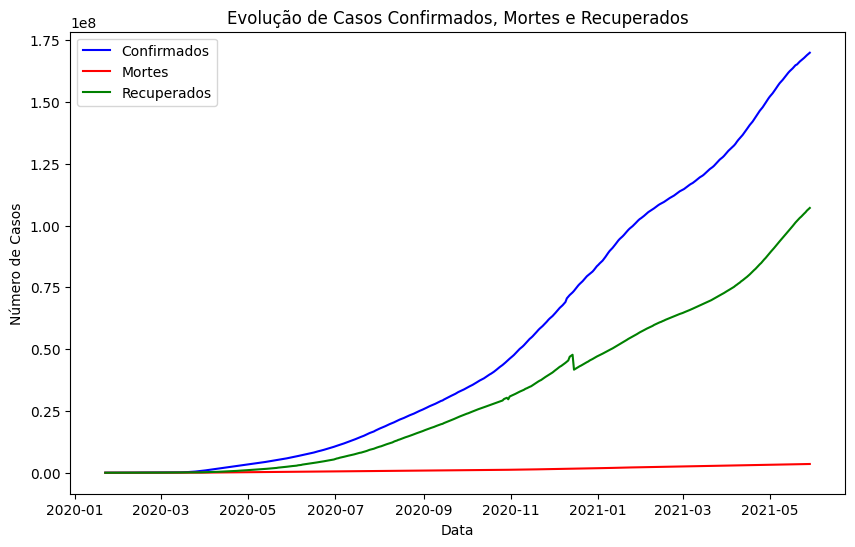

In [ ]:

df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

df_agg = df.groupby('ObservationDate').sum()[['Confirmed', 'Deaths', 'Recovered']]

plt.figure(figsize=(10, 6))
plt.plot(df_agg.index, df_agg['Confirmed'], label='Confirmados', color='blue')
plt.plot(df_agg.index, df_agg['Deaths'], label='Mortes', color='red')
plt.plot(df_agg.index, df_agg['Recovered'], label='Recuperados', color='green')
plt.title('Evolução de Casos Confirmados, Mortes e Recuperados')
plt.xlabel('Data')
plt.ylabel('Número de Casos')
plt.legend()
plt.show()


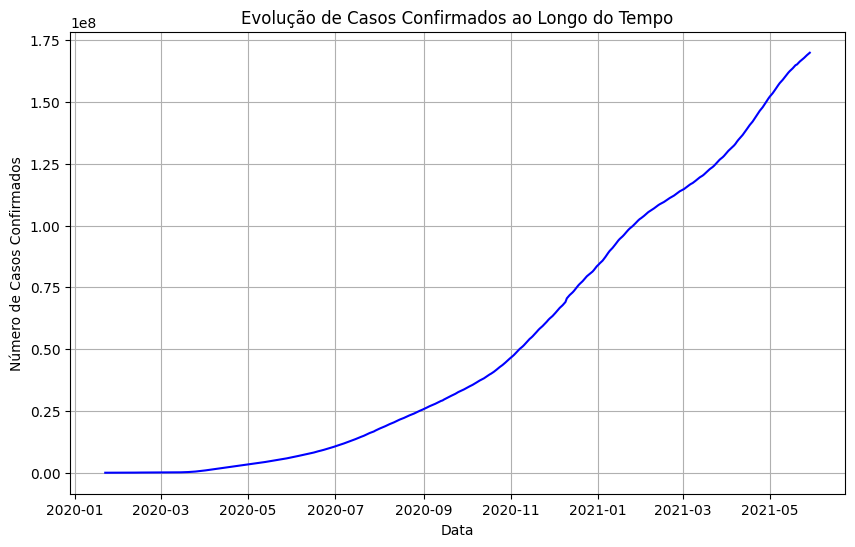

In [ ]:
# grafico 1

df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

df_agg = df.groupby('ObservationDate').sum()[['Confirmed', 'Deaths', 'Recovered']]

#Evolução dos casos confirmados
plt.figure(figsize=(10, 6))
plt.plot(df_agg.index, df_agg['Confirmed'], label='Confirmados', color='blue')
plt.title('Evolução de Casos Confirmados ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Casos Confirmados')
plt.grid(True)
plt.show()

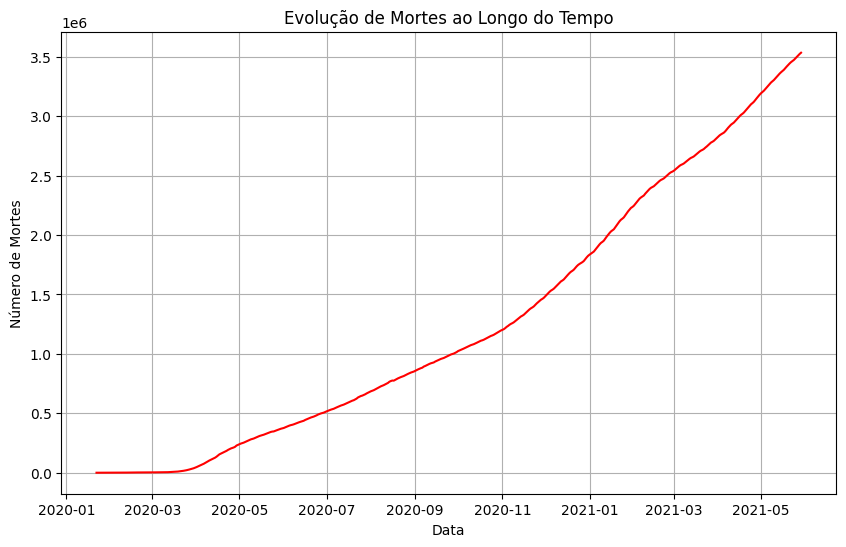

In [ ]:
#Gráfico 2 Evolução das mortes
plt.figure(figsize=(10, 6))
plt.plot(df_agg.index, df_agg['Deaths'], label='Mortes', color='red')
plt.title('Evolução de Mortes ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Mortes')
plt.grid(True)
plt.show()

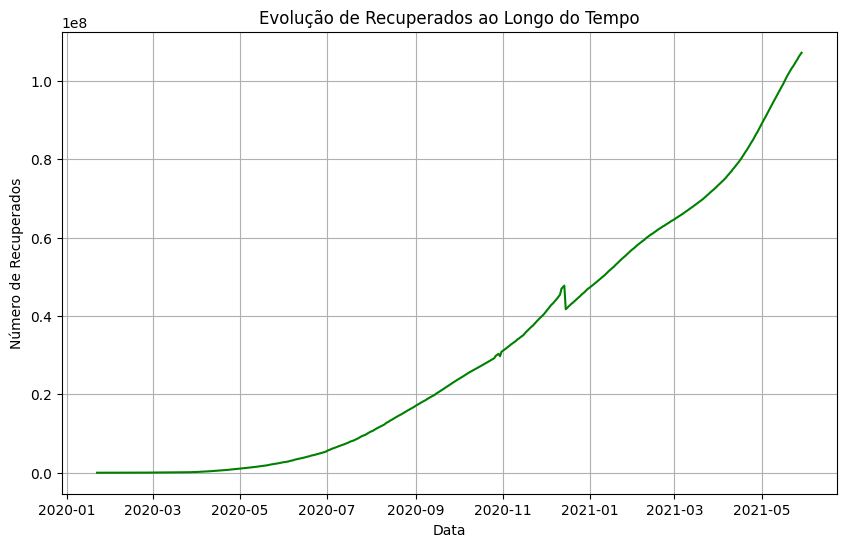

In [ ]:
#Gráfico 3 Evolução dos recuperados
plt.figure(figsize=(10, 6))
plt.plot(df_agg.index, df_agg['Recovered'], label='Recuperados', color='green')
plt.title('Evolução de Recuperados ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Recuperados')
plt.grid(True)
plt.show()

In [ ]:
# Calcular a chance de cura
df_agg = df.groupby('ObservationDate').sum()

total_confirmados = df_agg['Confirmed'].sum()
total_recuperados = df_agg['Recovered'].sum()

chance_de_cura = (total_recuperados / total_confirmados) * 100

print(f"A chance de uma pessoa infectada se curar é de aproximadamente {chance_de_cura:.2f}%")
print(f"A chance de uma pessoa infectada se curar é de aproximadamente {chance_de_cura:.2f}%")

A chance de uma pessoa infectada se curar é de aproximadamente 58.85%
A chance de uma pessoa infectada se curar é de aproximadamente 58.85%


<Figure size 1200x800 with 0 Axes>

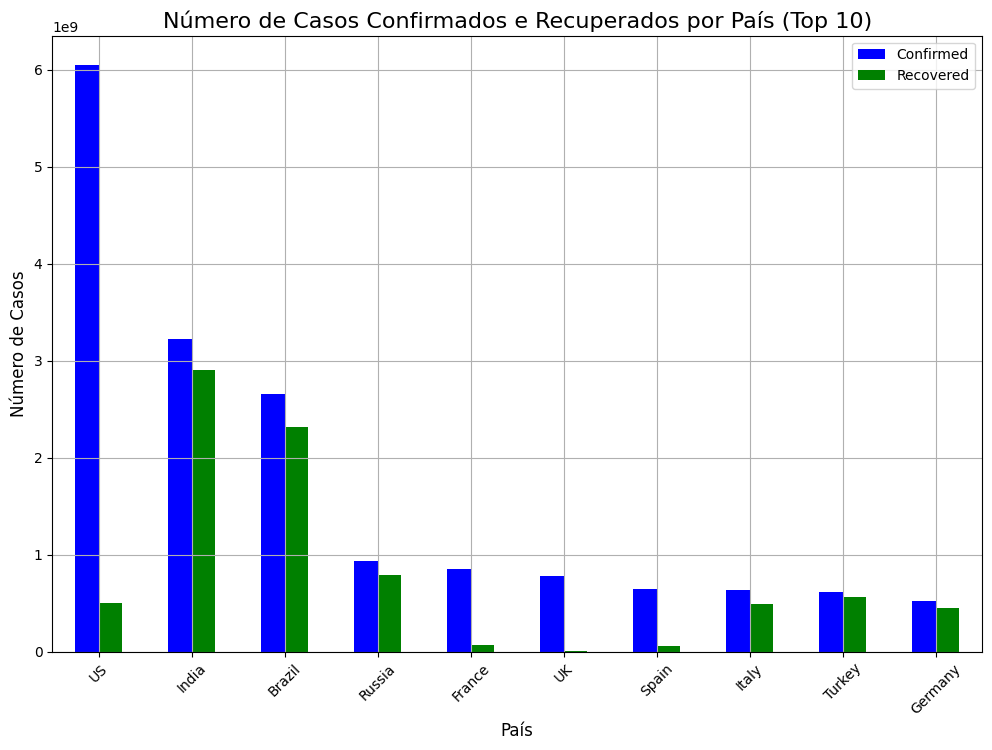

In [ ]:
# grafico de barras sobre indice de recuperacao sobre infectados

df = pd.read_csv('covid_19_data.csv')

df_por_pais = df.groupby('Country/Region').sum()[['Confirmed', 'Recovered']]

df_por_pais = df_por_pais.sort_values(by='Confirmed', ascending=False).head(10)

plt.figure(figsize=(12, 8))
df_por_pais.plot(kind='bar', figsize=(12, 8), color=['blue', 'green'])

plt.title('Número de Casos Confirmados e Recuperados por País (Top 10)', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)

plt.xticks(rotation=45)
plt.grid(True)
plt.show()